In [3]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

print(tf.__version__)

C:\Users\jingsi.huang\.conda\envs\3.6.8\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jingsi.huang\.conda\envs\3.6.8\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jingsi.huang\.conda\envs\3.6.8\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jingsi.huang\.conda\envs\3.6.8\lib\site-packages\ten

2.0.0-beta0


C:\Users\jingsi.huang\.conda\envs\3.6.8\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jingsi.huang\.conda\envs\3.6.8\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jingsi.huang\.conda\envs\3.6.8\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jingsi.huang\.conda\envs\3.6.8\

In [4]:

data_all=pd.read_csv("E:/工作/star/周期报告/学习/tensorflow/LTV预测模型/all_game_teamtopAND_allcolun.csv")
#print(data_all)
#(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
# Shuffle the training set
#order = np.argsort(np.random.random(train_labels.shape))
#前14天所有数据
#data=data_all[["1日LTV","2日LTV","3日LTV","4日LTV","5日LTV","6日LTV","7日LTV","8日LTV","9日LTV","10日LTV","11日LTV","12日LTV","13日LTV","14日LTV","1日付费率","2日付费率","3日付费率","4日付费率","5日付费率","6日付费率","7日付费率","8日付费率","9日付费率","10日付费率","11日付费率","12日付费率","13日付费率","14日付费率","次日留存率","3日留存率","4日留存率","5日留存率","6日留存率","7日留存率","8日留存率","9日留存率","10日留存率","11日留存率","12日留存率","13日留存率","14日留存率"]]
#前7天所有数据
data=data_all[["1日LTV","2日LTV","3日LTV","4日LTV","5日LTV","6日LTV","7日LTV","1日付费率","2日付费率","3日付费率","4日付费率","5日付费率","6日付费率","7日付费率","次日留存率","3日留存率","4日留存率","5日留存率","6日留存率"]]
#data=data_all[["1日LTV","3日LTV","5日LTV","7日LTV","14日LTV","次日留存率","3日留存率","5日留存率","7日留存率","14日留存率"]]
#data=data_all[["1日LTV","2日LTV","3日LTV","4日LTV","5日LTV","6日LTV","7日LTV"]]
#data=data_all[["1日LTV","3日LTV","5日LTV","7日LTV","14日LTV"]]
#label=data_all[["30日LTV","60日LTV","90日LTV","次日留存率"]]
print(data)
train_data = data[:18]
test_data = data[18:]
train_labels = data_all["60日LTV"][:18]
test_labels = data_all["60日LTV"][18:]
#print(train_data)

    1日LTV  2日LTV  3日LTV  4日LTV  5日LTV  6日LTV  7日LTV  1日付费率  2日付费率  3日付费率  \
0    3.32   4.93   5.81   6.33   6.57   6.84   6.99   0.10   0.14   0.15   
1    2.85   4.83   6.64   7.96   9.13   9.74  10.17   0.05   0.08   0.10   
2    4.53   7.77   9.73  11.07  12.47  13.66  14.59   0.07   0.11   0.14   
3    6.38  10.29  12.65  14.34  15.57  16.61  17.60   0.22   0.27   0.30   
4    2.98   5.31   7.05   8.38   9.36  10.22  10.95   0.04   0.07   0.09   
5    4.80   8.65  11.30  13.45  15.55  17.36  19.49   0.07   0.10   0.12   
6    3.83   7.56  10.54  12.96  15.11  17.09  19.17   0.07   0.10   0.12   
7    4.26   8.42  11.43  14.31  16.68  18.81  20.77   0.12   0.16   0.18   
8    4.52   7.93  10.18  11.78  13.10  14.29  15.50   0.09   0.13   0.15   
9    4.07   6.33   7.75   8.68   9.46  10.00  10.66   0.10   0.14   0.16   
10   1.05   1.73   1.97   2.24   2.44   2.76   2.95   0.05   0.07   0.08   
11   0.02   0.02   0.02   0.02   0.02   0.02   0.02   0.00   0.00   0.00   
12   3.16   

In [5]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (18, 19)
Testing set:  (5, 19)


In [6]:
print(train_labels[0:10])  # Display first 10 entries

0     8.80
1    21.00
2    28.79
3    31.06
4    21.78
5    43.22
6    41.78
7    59.92
8    46.37
9    16.84
Name: 60日LTV, dtype: float64


In [7]:
#标准化特征
mean = train_data.mean(axis=1)
#print(mean)

#std = train_data.std(axis=0)
#train_data = (train_data - mean) / std
#test_data = (test_data - mean) / std

#print(train_data)  # First training sample, normalized



In [8]:
#创建模型
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.compat.v1.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1280      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [9]:
#训练模型  对该模型训练 500 个周期，并将训练和验证准确率记录到 history 对象中。
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [10]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mae']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 20])

plot_history(history)


..................................................

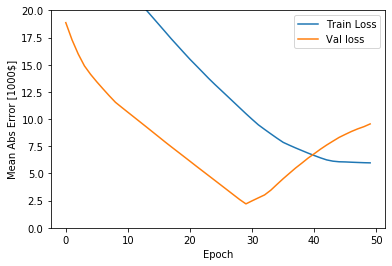

In [11]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [12]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)



18    54.58
19     8.83
20    39.70
21    21.90
22     2.70
Name: 60日LTV, dtype: float64
    60日LTV
18   54.58
19    8.83
20   39.70
21   21.90
22    2.70
[67.29676   5.845057 41.616325 25.021431  4.323646]


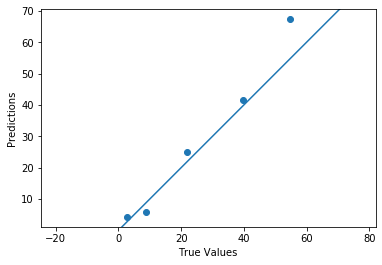

In [16]:
test_predictions = model.predict(test_data).flatten()
df=pd.DataFrame(test_labels)
print(test_labels)
print(df)
print(test_predictions)
df = pd.DataFrame(data,columns=['Name','Age'])


plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])